# Convert All Numberical Columns By Scaling and Convert Non-Numerical Column Into Numerical By Encoding And Display Different Types Of DataFrames

# Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

# NORMALIZATION
* MinMax Scaling
* Mean Scaling
* Absolute Maximum Scaling

### MinMax Scaling
* First, we are supposed to find the minimum and the maximum value of the column.
* Then we will subtract the minimum value from the entry and divide the result by the difference between the maximum and the minimum value.
* which the data will range after performing the above two steps is between 0 to 1.

In [1]:
# Formula :                       x(old) - x(min) 
#                    X(scaled) =  ---------------
#                                 x(max) - x(min)

### Mean Scaling
* This method is more or less the same as the previous method but here instead of the minimum value, we subtract each entry by the mean value of the whole data and then divide the results by the difference between the minimum and the maximum value.

In [2]:
# Formula:                        x(old) - x(MEAN)
#                   X(scaled) =   ----------------
#                                 x(max) - x(min)

### Absolute Maximum Scaling
* We should first select the maximum absolute value out of all the entries of a particular measure.
* Then after this, we divide each entry of the column by this maximum value.
* we will observe that each entry of the column lies in the range of -1 to 1. 
* But this method is not used that often the reason behind this is that it is too sensitive to the outliers. 

In [3]:
# Formula:                       x(old) - Max(|x|)
#                   X(scaled) =  -----------------
#                                    Max(|x|)

# STANDARDIZATION
* This method scales features so that they have a mean of 0 and a standard deviation of 1
* x is the original value of the feature
* mean is the mean of the feature values
* standard deviation is the standard deviation of the feature values
* Standardization preserves the shape of the distribution and is suitable when the data doesn't have strong outliers.

Formula:                         x(old) - MEAN
                X(scaled) =   ---------------------
                                standard deviation

# ROBUST SCALING
* In this method of scaling, we use two main statistical measures of the data.
* Median , Inter-Quartile Range
* After calculating these two values we are supposed to subtract the median from each entry and then divide the result by the interquartile range.

In [4]:
# FORMULA :                    x(old) - Q2       x(old) - x(MEDIAN)
#                X(scaled) =  -------------  =   ------------------
#                               Q3 - Q1                IQR

# Diamond DataSet

In [65]:
import numpy as np
import pandas as pd
import sklearn

In [66]:
# load DataSet
df = pd.read_csv(r"C:\Users\kalag\Downloads\diamonds.csv")

In [67]:
df.shape

(53940, 11)

In [68]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [69]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [70]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [71]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [72]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [74]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### No Null values are in this dataset

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [76]:
#     spliting the data
# ----------------------------

Y = df['price']
X = df.drop(columns = 'price')

In [77]:
# we split the data train and test using sklearn train-test-split

from sklearn.model_selection import train_test_split

In [78]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [79]:
# From data we can sepearate catagorical and continuous

X_cont = X[['carat','depth','table','x','y','z']]
X_catg = X[['cut','color','clarity']]

In [80]:
X_cont_Train,X_cont_Test,X_catg_Train,X_catg_Test,Y_Train,Y_Test = train_test_split(X_cont , X_catg , Y,
                                                                              test_size = 0.20,
                                                                              random_state = 100)

In [81]:
X_cont_Train.shape,X_cont_Test.shape,X_catg_Train.shape,X_catg_Test.shape,len(Y_Train),len(Y_Test)

((43152, 6), (10788, 6), (43152, 3), (10788, 3), 43152, 10788)

In [82]:
X_cont_Train

,carat,depth,table,x,y,z
27187,2.01,60.2,59.0,8.18,8.12,4.91
3118,0.79,62.0,55.9,5.88,5.95,3.67
49238,0.64,61.1,55.0,5.58,5.61,3.43
53575,0.70,62.7,56.0,5.73,5.63,3.56
29795,0.30,61.6,58.0,4.32,4.29,2.65
...,...,...,...,...,...,...
16304,1.07,62.9,59.0,6.49,6.52,4.09
79,0.26,62.6,59.0,4.06,4.09,2.55
12119,0.91,61.8,58.0,6.24,6.16,3.83
14147,1.25,62.4,58.0,6.89,6.85,4.29


In [83]:
# copy the train data & test data 
before_Norm_Train = X_cont_Train.copy()
before_Norm_Test = X_cont_Test.copy()

# MinMaxScaler

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
normScaler = MinMaxScaler()

In [86]:
normScaler.fit_transform(X_cont_Train)   # In the form of Array

array([[0.37629938, 0.47777778, 0.30769231, 0.76163873, 0.13786078,
        0.60918114],
       [0.12266112, 0.52777778, 0.24807692, 0.54748603, 0.10101868,
        0.45533499],
       [0.09147609, 0.50277778, 0.23076923, 0.51955307, 0.09524618,
        0.42555831],
       ...,
       [0.14760915, 0.52222222, 0.28846154, 0.58100559, 0.10458404,
        0.4751861 ],
       [0.21829522, 0.53888889, 0.28846154, 0.641527  , 0.11629881,
        0.53225806],
       [0.03118503, 0.53055556, 0.25      , 0.41992551, 0.07589134,
        0.34615385]])

In [87]:
X_cont_norm_Train = pd.DataFrame(normScaler.fit_transform(X_cont_Train),  # In the form of Pandas
                                columns = X_cont_Train.columns,
                                index = X_cont_Train.index)

In [88]:
X_cont_norm_Train

,carat,depth,table,x,y,z
27187,0.376299,0.477778,0.307692,0.761639,0.137861,0.609181
3118,0.122661,0.527778,0.248077,0.547486,0.101019,0.455335
49238,0.091476,0.502778,0.230769,0.519553,0.095246,0.425558
53575,0.103950,0.547222,0.250000,0.533520,0.095586,0.441687
29795,0.020790,0.516667,0.288462,0.402235,0.072835,0.328784
...,...,...,...,...,...,...
16304,0.180873,0.552778,0.307692,0.604283,0.110696,0.507444
79,0.012474,0.544444,0.307692,0.378026,0.069440,0.316377
12119,0.147609,0.522222,0.288462,0.581006,0.104584,0.475186
14147,0.218295,0.538889,0.288462,0.641527,0.116299,0.532258


In [89]:
X_cont_norm_Test = pd.DataFrame(normScaler.transform(X_cont_Test),
                                columns = X_cont_Test.columns,
                                index = X_cont_Test.index)

In [90]:
X_cont_norm_Test

,carat,depth,table,x,y,z
52264,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948
21073,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370
42161,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022
35974,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764
7641,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057
...,...,...,...,...,...,...
17694,0.209979,0.533333,0.230769,0.632216,0.115959,0.524814
22403,0.286902,0.502778,0.307692,0.692737,0.127674,0.566998
53573,0.103950,0.550000,0.269231,0.531657,0.095416,0.441687
7941,0.133056,0.463889,0.307692,0.573557,0.104075,0.455335


<Axes: ylabel='Count'>

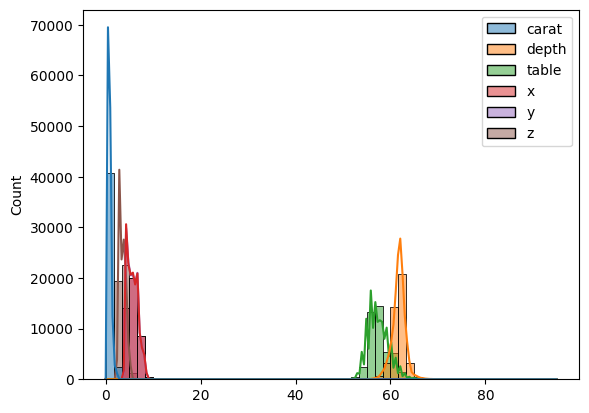

In [31]:
import seaborn as sns
sns.histplot(before_Norm_Train,kde = True)

<Axes: ylabel='Count'>

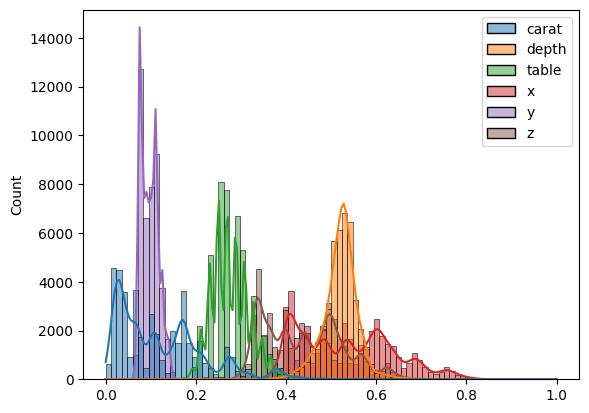

In [32]:
import seaborn as sns
sns.histplot(X_cont_norm_Train,kde = True)

# STANDARDIZATION

In [91]:
X_cont

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
StandScaler = StandardScaler()

In [94]:
X_cont_stnd_Train = pd.DataFrame(StandScaler.fit_transform(X_cont_Train),  # In the form of Pandas
                                columns = X_cont_Train.columns,
                                index = X_cont_Train.index)

In [95]:
X_cont_stnd_Train

,carat,depth,table,x,y,z
27187,2.552968,-1.084836,0.691895,2.180549,2.073410,1.969676
3118,-0.018674,0.169249,-0.693121,0.130733,0.185285,0.186833
49238,-0.334860,-0.457793,-1.095222,-0.136634,-0.110550,-0.158233
53575,-0.208386,0.656949,-0.648443,-0.002950,-0.093148,0.028678
29795,-1.051547,-0.109436,0.245116,-1.259576,-1.259087,-1.279699
...,...,...,...,...,...,...
16304,0.571539,0.796292,0.691895,0.674380,0.681244,0.790699
79,-1.135863,0.587278,0.691895,-1.491295,-1.433108,-1.423477
12119,0.234274,0.029906,0.245116,0.451574,0.368007,0.416877
14147,0.950961,0.447935,0.245116,1.030870,0.968378,1.078255


In [96]:
X_cont_stnd_Test = pd.DataFrame(StandScaler.transform(X_cont_Test),
                                columns = X_cont_Test.columns,
                                index = X_cont_Test.index)

In [97]:
X_cont_stnd_Test

,carat,depth,table,x,y,z
52264,-0.482413,-0.179108,-0.201664,-0.341615,-0.362880,-0.373900
21073,0.761250,-0.179108,-1.095222,0.906098,0.933574,0.905721
42161,-0.608887,1.005306,0.245116,-0.608983,-0.571705,-0.488922
35974,-0.798599,-0.806150,-0.648443,-0.805052,-0.754427,-0.862744
7641,0.002405,0.587278,0.245116,0.139646,0.167883,0.229966
...,...,...,...,...,...,...
17694,0.866645,0.308592,-1.095222,0.941747,0.950976,0.991988
22403,1.646570,-0.457793,0.691895,1.521043,1.551348,1.480832
53573,-0.208386,0.726621,-0.201664,-0.020775,-0.101849,0.028678
7941,0.086721,-1.433193,0.691895,0.380276,0.341904,0.186833


<Axes: ylabel='Count'>

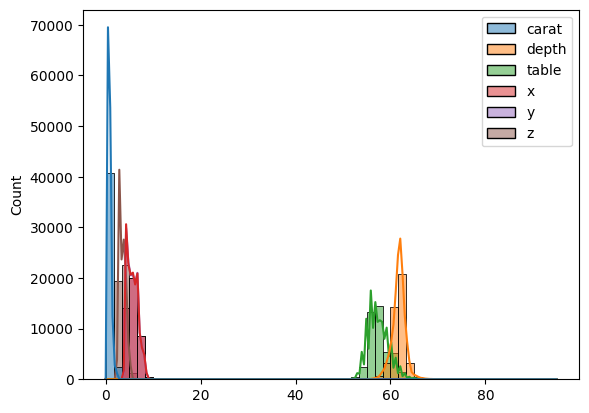

In [40]:
sns.histplot(before_Norm_Train,kde = True)

<Axes: ylabel='Count'>

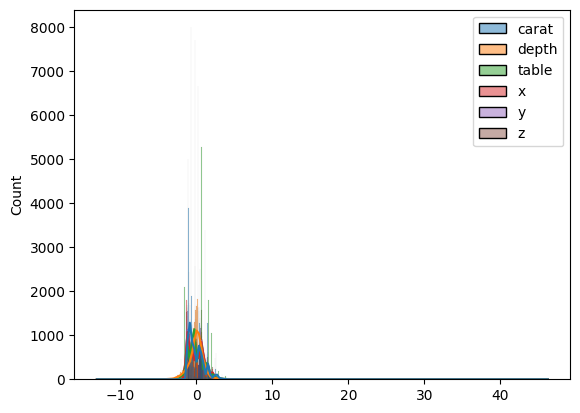

In [41]:
sns.histplot(X_cont_stnd_Train,kde = True)

# Robust Scaler

In [98]:
from sklearn.preprocessing import RobustScaler

In [99]:
robstScaler = RobustScaler()

In [100]:
X_cont_robst_Train = pd.DataFrame(robstScaler.fit_transform(X_cont_Train),
                                columns = X_cont_Train.columns,
                                index = X_cont_Train.index)

In [101]:
X_cont_robst_Train

,carat,depth,table,x,y,z
27187,2.046875,-1.142857,0.666667,1.355191,1.324176,1.221239
3118,0.140625,0.142857,-0.366667,0.098361,0.131868,0.123894
49238,-0.093750,-0.500000,-0.666667,-0.065574,-0.054945,-0.088496
53575,0.000000,0.642857,-0.333333,0.016393,-0.043956,0.026549
29795,-0.625000,-0.142857,0.333333,-0.754098,-0.780220,-0.778761
...,...,...,...,...,...,...
16304,0.578125,0.785714,0.666667,0.431694,0.445055,0.495575
79,-0.687500,0.571429,0.666667,-0.896175,-0.890110,-0.867257
12119,0.328125,0.000000,0.333333,0.295082,0.247253,0.265487
14147,0.859375,0.428571,0.333333,0.650273,0.626374,0.672566


In [102]:
X_cont_robst_Test = pd.DataFrame(robstScaler.transform(X_cont_Test),
                                columns = X_cont_Test.columns,
                                index = X_cont_Test.index)

In [103]:
X_cont_robst_Test

,carat,depth,table,x,y,z
52264,-0.203125,-0.214286,0.000000,-0.191257,-0.214286,-0.221239
21073,0.718750,-0.214286,-0.666667,0.573770,0.604396,0.566372
42161,-0.296875,1.000000,0.333333,-0.355191,-0.346154,-0.292035
35974,-0.437500,-0.857143,-0.333333,-0.475410,-0.461538,-0.522124
7641,0.156250,0.571429,0.333333,0.103825,0.120879,0.150442
...,...,...,...,...,...,...
17694,0.796875,0.285714,-0.666667,0.595628,0.615385,0.619469
22403,1.375000,-0.500000,0.666667,0.950820,0.994505,0.920354
53573,0.000000,0.714286,0.000000,0.005464,-0.049451,0.026549
7941,0.218750,-1.500000,0.666667,0.251366,0.230769,0.123894


# Categorical Encoding

# Odinal Encoding


In [240]:
# nominal train & test
X_catg_Train_nominal = X_catg_Train[['color','clarity']]
X_catg_Test_nominal = X_catg_Test[['color','clarity']]

# odinal train & test
X_catg_Train_odinal = X_catg_Train['cut']
X_catg_Test_odinal = X_catg_Test['cut']

In [142]:
cut_dict = {'Fair':0, "Good":1,"Very Good":2,'Ideal':3,"Premium":4}

In [241]:
X_catg_Train_odinal = pd.DataFrame(X_catg_Train_odinal.map(cut_dict))

In [242]:
X_catg_Train_odinal

,cut
27187,4
3118,3
49238,3
53575,3
29795,4
...,...
16304,2
79,2
12119,4
14147,4


In [243]:
X_catg_Test_odinal = pd.DataFrame(X_catg_Test_odinal.map(cut_dict))

In [244]:
X_catg_Test_odinal

,cut
52264,3
21073,3
42161,3
35974,3
7641,4
...,...
17694,3
22403,4
53573,3
7941,4


# One Hot Encoding

In [147]:
X_catg_Train[['color','clarity']]

,color,clarity
27187,I,SI1
3118,H,VVS2
49238,H,VVS1
53575,E,VS2
29795,D,SI1
...,...,...
16304,G,VS2
79,E,VVS1
12119,G,VVS2
14147,I,SI1


In [148]:
from sklearn.preprocessing import OneHotEncoder

In [149]:
OneHotEncoder = OneHotEncoder(drop='first', sparse_output=False)

In [247]:
X_catg_Train_Nominal_oneHot = pd.DataFrame(OneHotEncoder.fit_transform(X_catg_Train_nominal),
                                    columns = OneHotEncoder.get_feature_names_out(),
                                    index = X_catg_Train_nominal.index)

In [248]:
X_catg_Train_Nominal_oneHot

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
27187,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3118,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53575,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14147,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [249]:
X_catg_Test_Nominal_oneHot = pd.DataFrame(OneHotEncoder.transform(X_catg_Test_nominal),
                                    columns = OneHotEncoder.get_feature_names_out(),
                                    index = X_catg_Test_nominal.index)

In [250]:
X_catg_Test_Nominal_oneHot

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
52264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42161,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35974,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7641,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17694,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22403,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53573,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Binary Encoding

In [252]:
import category_encoders
from category_encoders import BinaryEncoder

In [253]:
BinaryEncoder = BinaryEncoder(cols = X_catg_Train_nominal.columns)

In [254]:
X_catg_Train_Nominal_binary = pd.DataFrame(BinaryEncoder.fit_transform(X_catg_Train_nominal),
                                    columns = BinaryEncoder.get_feature_names_out(),
                                    index = X_catg_Train_nominal.index)

In [255]:
X_catg_Train_Nominal_binary

,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3
27187,0,0,1,0,0,0,1
3118,0,1,0,0,0,1,0
49238,0,1,0,0,0,1,1
53575,0,1,1,0,1,0,0
29795,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
16304,1,1,0,0,1,0,0
79,0,1,1,0,0,1,1
12119,1,1,0,0,0,1,0
14147,0,0,1,0,0,0,1


In [295]:
X_catg_Test_Nominal_binary = pd.DataFrame(BinaryEncoder.transform(X_catg_Test_nominal),
                                        columns = BinaryEncoder.get_feature_names_out(),
                                        index = X_catg_Test_nominal.index)

In [296]:
X_catg_Test_Nominal_binary

,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3
52264,0,1,1,0,1,0,0
21073,1,1,0,0,1,0,1
42161,1,1,0,0,0,0,1
35974,1,0,1,0,1,0,1
7641,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...
17694,0,0,1,0,0,1,0
22403,0,0,1,0,1,0,1
53573,0,1,1,0,1,0,0
7941,0,1,1,0,1,0,1


# Target Encoding

In [220]:
from category_encoders import TargetEncoder

In [222]:
TargetEncoder = TargetEncoder(cols = ['color','clarity'])

In [223]:
X_catg_Train_nominal_target = TargetEncoder.fit_transform(X_catg_Train_nominal,Y_Train)

In [224]:
X_catg_Train_nominal_target

,color,clarity
27187,5077.962264,4026.166141
3118,4481.537004,3305.480443
49238,4481.537004,2525.429945
53575,3086.743721,3940.186122
29795,3163.157295,4026.166141
...,...,...
16304,4015.074074,3940.186122
79,3086.743721,2525.429945
12119,4015.074074,3305.480443
14147,5077.962264,4026.166141


In [225]:
X_catg_Test_nominal_target = TargetEncoder.transform(X_catg_Test_nominal,Y_Test)

In [226]:
X_catg_Test_nominal_target

,color,clarity
52264,3086.743721,3940.186122
21073,4015.074074,3864.729701
42161,4015.074074,4026.166141
35974,3765.883736,3864.729701
7641,4015.074074,2861.570000
...,...,...
17694,5077.962264,3305.480443
22403,5077.962264,3864.729701
53573,3086.743721,3940.186122
7941,3086.743721,3864.729701


# Leave One Out Encoder

In [227]:
from category_encoders import LeaveOneOutEncoder

In [228]:
LeaveOneOutEncoder = LeaveOneOutEncoder()

In [229]:
X_catg_Train_nominal

,color,clarity
27187,I,SI1
3118,H,VVS2
49238,H,VVS1
53575,E,VS2
29795,D,SI1
...,...,...
16304,G,VS2
79,E,VVS1
12119,G,VVS2
14147,I,SI1


In [233]:
X_catg_Train_nominal_targetloe = LeaveOneOutEncoder.fit_transform(X_catg_Train_nominal,Y_Train)

In [236]:
X_catg_Train_nominal_targetloe

,color,clarity
27187,5075.109321,4024.881234
3118,4481.711148,3305.475886
49238,4481.897698,2525.581587
53575,3086.793420,3940.312991
29795,3163.615845,4026.483088
...,...,...
16304,4014.795719,3939.922339
79,3087.066692,2526.107180
12119,4014.946324,3305.022392
14147,5077.809896,4026.002389


In [238]:
X_catg_Test_nominal_targetloe = LeaveOneOutEncoder.transform(X_catg_Test_nominal,Y_Test)

In [239]:
X_catg_Test_nominal_targetloe

,color,clarity
52264,3086.819689,3940.334014
21073,4014.493734,3863.912568
42161,4015.376955,4026.428148
35974,3766.253345,3865.176533
7641,4015.046024,2860.564689
...,...,...
17694,5077.489068,3304.538386
22403,5076.730955,3863.733455
53573,3086.793420,3940.312991
7941,3086.586713,3864.660899


# `Different Types of DataFrames`

# The Dataframe of `Normalization` and `OneHotEncoding` for nominal and `OdinalEncoding` for cut column which is odinal

In [262]:
X_Train_1 = pd.concat([X_cont_norm_Train,X_catg_Train_odinal,X_catg_Train_Nominal_oneHot],axis =1)

In [264]:
X_Train_1.head()

,carat,depth,table,x,y,z,cut,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
27187,0.376299,0.477778,0.307692,0.761639,0.137861,0.609181,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3118,0.122661,0.527778,0.248077,0.547486,0.101019,0.455335,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49238,0.091476,0.502778,0.230769,0.519553,0.095246,0.425558,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53575,0.103950,0.547222,0.250000,0.533520,0.095586,0.441687,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29795,0.020790,0.516667,0.288462,0.402235,0.072835,0.328784,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [271]:
X_Test_1 = pd.concat([X_cont_norm_Test,X_catg_Test_odinal,X_catg_Test_Nominal_oneHot],axis =1)

In [272]:
X_Test_1.head()

,carat,depth,table,x,y,z,cut,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
52264,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21073,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42161,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35974,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7641,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# The Dataframe of `Standadization` and `OneHotEncoding` and `OdinalEncoding` for cut column which is odinal

In [265]:
X_Train_2 = pd.concat([X_cont_stnd_Train,X_catg_Train_odinal,X_catg_Train_Nominal_oneHot],axis =1)

In [266]:
X_Train_2.head()

,carat,depth,table,x,y,z,cut,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
27187,2.552968,-1.084836,0.691895,2.180549,2.073410,1.969676,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3118,-0.018674,0.169249,-0.693121,0.130733,0.185285,0.186833,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49238,-0.334860,-0.457793,-1.095222,-0.136634,-0.110550,-0.158233,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53575,-0.208386,0.656949,-0.648443,-0.002950,-0.093148,0.028678,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29795,-1.051547,-0.109436,0.245116,-1.259576,-1.259087,-1.279699,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [275]:
X_Test_2 = pd.concat([X_cont_stnd_Test,X_catg_Test_odinal,X_catg_Test_Nominal_oneHot],axis =1)

In [285]:
X_Test_2.head()

,carat,depth,table,x,y,z,cut,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
52264,-0.203125,-0.214286,0.000000,-0.191257,-0.214286,-0.221239,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21073,0.718750,-0.214286,-0.666667,0.573770,0.604396,0.566372,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42161,-0.296875,1.000000,0.333333,-0.355191,-0.346154,-0.292035,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35974,-0.437500,-0.857143,-0.333333,-0.475410,-0.461538,-0.522124,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7641,0.156250,0.571429,0.333333,0.103825,0.120879,0.150442,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# The Dataframe of `Robust scaling` and `OneHotEncoding` and `OdinalEncoding` for cut column which is odinal

In [281]:
X_Train_3 = pd.concat([X_cont_robst_Train,X_catg_Train_odinal,X_catg_Train_Nominal_oneHot],axis =1)

In [282]:
X_Train_3.head()

,carat,depth,table,x,y,z,cut,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
27187,2.046875,-1.142857,0.666667,1.355191,1.324176,1.221239,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3118,0.140625,0.142857,-0.366667,0.098361,0.131868,0.123894,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49238,-0.093750,-0.500000,-0.666667,-0.065574,-0.054945,-0.088496,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53575,0.000000,0.642857,-0.333333,0.016393,-0.043956,0.026549,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29795,-0.625000,-0.142857,0.333333,-0.754098,-0.780220,-0.778761,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [283]:
X_Test_4 = pd.concat([X_cont_robst_Test,X_catg_Test_odinal,X_catg_Test_Nominal_oneHot],axis =1)

In [284]:
X_Test_4.head()

,carat,depth,table,x,y,z,cut,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
52264,-0.203125,-0.214286,0.000000,-0.191257,-0.214286,-0.221239,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21073,0.718750,-0.214286,-0.666667,0.573770,0.604396,0.566372,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42161,-0.296875,1.000000,0.333333,-0.355191,-0.346154,-0.292035,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35974,-0.437500,-0.857143,-0.333333,-0.475410,-0.461538,-0.522124,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7641,0.156250,0.571429,0.333333,0.103825,0.120879,0.150442,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# The Dataframe of `Normalization` and `BinaryEncoding`and`OdinalEncoding`for cut column which is odinal

In [286]:
X_Train_5 = pd.concat([X_cont_norm_Train,X_catg_Train_odinal,X_catg_Train_Nominal_binary],axis =1)

In [287]:
X_Train_5.head()

,carat,depth,table,x,y,z,cut,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3
27187,0.376299,0.477778,0.307692,0.761639,0.137861,0.609181,4,0,0,1,0,0,0,1
3118,0.122661,0.527778,0.248077,0.547486,0.101019,0.455335,3,0,1,0,0,0,1,0
49238,0.091476,0.502778,0.230769,0.519553,0.095246,0.425558,3,0,1,0,0,0,1,1
53575,0.103950,0.547222,0.250000,0.533520,0.095586,0.441687,3,0,1,1,0,1,0,0
29795,0.020790,0.516667,0.288462,0.402235,0.072835,0.328784,4,1,0,0,0,0,0,1


In [300]:
X_Test_5 = pd.concat([X_cont_norm_Test,X_catg_Test_odinal,X_catg_Test_Nominal_binary],axis =1)

In [301]:
X_Test_5.head()

,carat,depth,table,x,y,z,cut,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3
52264,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948,3,0,1,1,0,1,0,0
21073,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370,3,1,1,0,0,1,0,1
42161,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022,3,1,1,0,0,0,0,1
35974,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764,3,1,0,1,0,1,0,1
7641,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057,4,1,1,0,1,0,0,0


# The Dataframe of `Standadization` and `BinaryEncoding` and `OdinalEncoding` for cut column which is odinal

In [302]:
X_Train_6 = pd.concat([X_cont_stnd_Train,X_catg_Train_odinal,X_catg_Train_Nominal_binary],axis =1)

In [303]:
X_Train_6.head()

,carat,depth,table,x,y,z,cut,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3
27187,2.552968,-1.084836,0.691895,2.180549,2.073410,1.969676,4,0,0,1,0,0,0,1
3118,-0.018674,0.169249,-0.693121,0.130733,0.185285,0.186833,3,0,1,0,0,0,1,0
49238,-0.334860,-0.457793,-1.095222,-0.136634,-0.110550,-0.158233,3,0,1,0,0,0,1,1
53575,-0.208386,0.656949,-0.648443,-0.002950,-0.093148,0.028678,3,0,1,1,0,1,0,0
29795,-1.051547,-0.109436,0.245116,-1.259576,-1.259087,-1.279699,4,1,0,0,0,0,0,1


In [305]:
X_Test_6 = pd.concat([X_cont_stnd_Test,X_catg_Test_odinal,X_catg_Test_Nominal_binary],axis =1)

In [306]:
X_Test_6.head()

,carat,depth,table,x,y,z,cut,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3
52264,-0.482413,-0.179108,-0.201664,-0.341615,-0.362880,-0.373900,3,0,1,1,0,1,0,0
21073,0.761250,-0.179108,-1.095222,0.906098,0.933574,0.905721,3,1,1,0,0,1,0,1
42161,-0.608887,1.005306,0.245116,-0.608983,-0.571705,-0.488922,3,1,1,0,0,0,0,1
35974,-0.798599,-0.806150,-0.648443,-0.805052,-0.754427,-0.862744,3,1,0,1,0,1,0,1
7641,0.002405,0.587278,0.245116,0.139646,0.167883,0.229966,4,1,1,0,1,0,0,0


# The Dataframe of `Robust scaling` and `BinaryEncoding` and `OdinalEncoding` for cut column which is odinal

In [308]:
X_Train_7 = pd.concat([X_cont_robst_Train,X_catg_Train_odinal,X_catg_Train_Nominal_binary],axis =1)

In [309]:
X_Train_7.head()

,carat,depth,table,x,y,z,cut,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3
27187,2.046875,-1.142857,0.666667,1.355191,1.324176,1.221239,4,0,0,1,0,0,0,1
3118,0.140625,0.142857,-0.366667,0.098361,0.131868,0.123894,3,0,1,0,0,0,1,0
49238,-0.093750,-0.500000,-0.666667,-0.065574,-0.054945,-0.088496,3,0,1,0,0,0,1,1
53575,0.000000,0.642857,-0.333333,0.016393,-0.043956,0.026549,3,0,1,1,0,1,0,0
29795,-0.625000,-0.142857,0.333333,-0.754098,-0.780220,-0.778761,4,1,0,0,0,0,0,1


In [310]:
X_Test_7 = pd.concat([X_cont_robst_Test,X_catg_Test_odinal,X_catg_Test_Nominal_binary],axis =1)

In [311]:
X_Test_7.head()

,carat,depth,table,x,y,z,cut,color_0,color_1,color_2,clarity_0,clarity_1,clarity_2,clarity_3
52264,-0.203125,-0.214286,0.000000,-0.191257,-0.214286,-0.221239,3,0,1,1,0,1,0,0
21073,0.718750,-0.214286,-0.666667,0.573770,0.604396,0.566372,3,1,1,0,0,1,0,1
42161,-0.296875,1.000000,0.333333,-0.355191,-0.346154,-0.292035,3,1,1,0,0,0,0,1
35974,-0.437500,-0.857143,-0.333333,-0.475410,-0.461538,-0.522124,3,1,0,1,0,1,0,1
7641,0.156250,0.571429,0.333333,0.103825,0.120879,0.150442,4,1,1,0,1,0,0,0


# The Dataframe of `Normalization` and `TargetEncoding`and`OdinalEncoding`for cut column which is odinal

In [313]:
X_Train_8 = pd.concat([X_cont_norm_Train,X_catg_Train_odinal,X_catg_Train_nominal_target],axis =1)

In [314]:
X_Train_8.head()

,carat,depth,table,x,y,z,cut,color,clarity
27187,0.376299,0.477778,0.307692,0.761639,0.137861,0.609181,4,5077.962264,4026.166141
3118,0.122661,0.527778,0.248077,0.547486,0.101019,0.455335,3,4481.537004,3305.480443
49238,0.091476,0.502778,0.230769,0.519553,0.095246,0.425558,3,4481.537004,2525.429945
53575,0.103950,0.547222,0.250000,0.533520,0.095586,0.441687,3,3086.743721,3940.186122
29795,0.020790,0.516667,0.288462,0.402235,0.072835,0.328784,4,3163.157295,4026.166141


In [317]:
X_Test_8 = pd.concat([X_cont_norm_Test,X_catg_Test_odinal,X_catg_Test_nominal_target],axis =1)

In [318]:
X_Test_8.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948,3,3086.743721,3940.186122
21073,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370,3,4015.074074,3864.729701
42161,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022,3,4015.074074,4026.166141
35974,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764,3,3765.883736,3864.729701
7641,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057,4,4015.074074,2861.570000


# The Dataframe of `Standadization` and `TargetEncoding` and `OdinalEncoding` for cut column which is odinal

In [321]:
X_Train_9 = pd.concat([X_cont_stnd_Train,X_catg_Train_odinal,X_catg_Train_nominal_target],axis =1)

In [322]:
X_Train_9.head()

,carat,depth,table,x,y,z,cut,color,clarity
27187,2.552968,-1.084836,0.691895,2.180549,2.073410,1.969676,4,5077.962264,4026.166141
3118,-0.018674,0.169249,-0.693121,0.130733,0.185285,0.186833,3,4481.537004,3305.480443
49238,-0.334860,-0.457793,-1.095222,-0.136634,-0.110550,-0.158233,3,4481.537004,2525.429945
53575,-0.208386,0.656949,-0.648443,-0.002950,-0.093148,0.028678,3,3086.743721,3940.186122
29795,-1.051547,-0.109436,0.245116,-1.259576,-1.259087,-1.279699,4,3163.157295,4026.166141


In [323]:
X_Test_9 = pd.concat([X_cont_stnd_Test,X_catg_Test_odinal,X_catg_Test_nominal_target],axis =1)

In [324]:
X_Test_9.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,-0.482413,-0.179108,-0.201664,-0.341615,-0.362880,-0.373900,3,3086.743721,3940.186122
21073,0.761250,-0.179108,-1.095222,0.906098,0.933574,0.905721,3,4015.074074,3864.729701
42161,-0.608887,1.005306,0.245116,-0.608983,-0.571705,-0.488922,3,4015.074074,4026.166141
35974,-0.798599,-0.806150,-0.648443,-0.805052,-0.754427,-0.862744,3,3765.883736,3864.729701
7641,0.002405,0.587278,0.245116,0.139646,0.167883,0.229966,4,4015.074074,2861.570000


# The Dataframe of `Robust scaling` and `TargetEncoding` and `OdinalEncoding` for cut column which is odinal

In [327]:
X_Train_10 = pd.concat([X_cont_robst_Train,X_catg_Train_odinal,X_catg_Train_nominal_target],axis =1)

In [328]:
X_Train_10.head()

,carat,depth,table,x,y,z,cut,color,clarity
27187,2.046875,-1.142857,0.666667,1.355191,1.324176,1.221239,4,5077.962264,4026.166141
3118,0.140625,0.142857,-0.366667,0.098361,0.131868,0.123894,3,4481.537004,3305.480443
49238,-0.093750,-0.500000,-0.666667,-0.065574,-0.054945,-0.088496,3,4481.537004,2525.429945
53575,0.000000,0.642857,-0.333333,0.016393,-0.043956,0.026549,3,3086.743721,3940.186122
29795,-0.625000,-0.142857,0.333333,-0.754098,-0.780220,-0.778761,4,3163.157295,4026.166141


In [330]:
X_Test_10 = pd.concat([X_cont_robst_Test,X_catg_Test_odinal,X_catg_Test_nominal_target],axis =1)

In [331]:
X_Test_10.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,-0.203125,-0.214286,0.000000,-0.191257,-0.214286,-0.221239,3,3086.743721,3940.186122
21073,0.718750,-0.214286,-0.666667,0.573770,0.604396,0.566372,3,4015.074074,3864.729701
42161,-0.296875,1.000000,0.333333,-0.355191,-0.346154,-0.292035,3,4015.074074,4026.166141
35974,-0.437500,-0.857143,-0.333333,-0.475410,-0.461538,-0.522124,3,3765.883736,3864.729701
7641,0.156250,0.571429,0.333333,0.103825,0.120879,0.150442,4,4015.074074,2861.570000


# The Dataframe of `Normalization` and `leaveOneOutEndocing` and `OdinalEncoding`for cut column which is odinal

In [332]:
X_Train_11 = pd.concat([X_cont_norm_Train,X_catg_Train_odinal,X_catg_Train_nominal_targetloe],axis =1)

In [333]:
X_Train_11.head()

,carat,depth,table,x,y,z,cut,color,clarity
27187,0.376299,0.477778,0.307692,0.761639,0.137861,0.609181,4,5075.109321,4024.881234
3118,0.122661,0.527778,0.248077,0.547486,0.101019,0.455335,3,4481.711148,3305.475886
49238,0.091476,0.502778,0.230769,0.519553,0.095246,0.425558,3,4481.897698,2525.581587
53575,0.103950,0.547222,0.250000,0.533520,0.095586,0.441687,3,3086.793420,3940.312991
29795,0.020790,0.516667,0.288462,0.402235,0.072835,0.328784,4,3163.615845,4026.483088


In [334]:
X_Test_11 = pd.concat([X_cont_norm_Test,X_catg_Test_odinal,X_catg_Test_nominal_targetloe],axis =1)

In [335]:
X_Test_11.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948,3,3086.819689,3940.334014
21073,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370,3,4014.493734,3863.912568
42161,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022,3,4015.376955,4026.428148
35974,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764,3,3766.253345,3865.176533
7641,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057,4,4015.046024,2860.564689


# The Dataframe of `Standadization` and `leaveOneOutEndocing` and `OdinalEncoding` for cut column which is odinal

In [336]:
X_Train_12 = pd.concat([X_cont_stnd_Train,X_catg_Train_odinal,X_catg_Train_nominal_targetloe],axis =1)

In [337]:
X_Train_12.head()

,carat,depth,table,x,y,z,cut,color,clarity
27187,2.552968,-1.084836,0.691895,2.180549,2.073410,1.969676,4,5075.109321,4024.881234
3118,-0.018674,0.169249,-0.693121,0.130733,0.185285,0.186833,3,4481.711148,3305.475886
49238,-0.334860,-0.457793,-1.095222,-0.136634,-0.110550,-0.158233,3,4481.897698,2525.581587
53575,-0.208386,0.656949,-0.648443,-0.002950,-0.093148,0.028678,3,3086.793420,3940.312991
29795,-1.051547,-0.109436,0.245116,-1.259576,-1.259087,-1.279699,4,3163.615845,4026.483088


In [339]:
X_Test_12 = pd.concat([X_cont_stnd_Test,X_catg_Test_odinal,X_catg_Test_nominal_targetloe],axis =1)

In [340]:
X_Test_12.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,-0.482413,-0.179108,-0.201664,-0.341615,-0.362880,-0.373900,3,3086.819689,3940.334014
21073,0.761250,-0.179108,-1.095222,0.906098,0.933574,0.905721,3,4014.493734,3863.912568
42161,-0.608887,1.005306,0.245116,-0.608983,-0.571705,-0.488922,3,4015.376955,4026.428148
35974,-0.798599,-0.806150,-0.648443,-0.805052,-0.754427,-0.862744,3,3766.253345,3865.176533
7641,0.002405,0.587278,0.245116,0.139646,0.167883,0.229966,4,4015.046024,2860.564689


# The Dataframe of `Robust scaling` and `leaveOneOutEndocing` and `OdinalEncoding` for cut column which is odinal

In [342]:
X_Train_13 = pd.concat([X_cont_robst_Train,X_catg_Train_odinal,X_catg_Train_nominal_targetloe],axis =1)

In [343]:
X_Train_13.head()

,carat,depth,table,x,y,z,cut,color,clarity
27187,2.046875,-1.142857,0.666667,1.355191,1.324176,1.221239,4,5075.109321,4024.881234
3118,0.140625,0.142857,-0.366667,0.098361,0.131868,0.123894,3,4481.711148,3305.475886
49238,-0.093750,-0.500000,-0.666667,-0.065574,-0.054945,-0.088496,3,4481.897698,2525.581587
53575,0.000000,0.642857,-0.333333,0.016393,-0.043956,0.026549,3,3086.793420,3940.312991
29795,-0.625000,-0.142857,0.333333,-0.754098,-0.780220,-0.778761,4,3163.615845,4026.483088


In [345]:
X_Test_13 = pd.concat([X_cont_robst_Test,X_catg_Test_odinal,X_catg_Test_nominal_targetloe],axis =1)

In [346]:
X_Test_13.head()

,carat,depth,table,x,y,z,cut,color,clarity
52264,-0.203125,-0.214286,0.000000,-0.191257,-0.214286,-0.221239,3,3086.819689,3940.334014
21073,0.718750,-0.214286,-0.666667,0.573770,0.604396,0.566372,3,4014.493734,3863.912568
42161,-0.296875,1.000000,0.333333,-0.355191,-0.346154,-0.292035,3,4015.376955,4026.428148
35974,-0.437500,-0.857143,-0.333333,-0.475410,-0.461538,-0.522124,3,3766.253345,3865.176533
7641,0.156250,0.571429,0.333333,0.103825,0.120879,0.150442,4,4015.046024,2860.564689
